In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from joblib import load
from google.colab import drive

# ----------------------------------
# 📌 1️⃣ Load Models & Data
# ----------------------------------

In [7]:
# Load best models
drive.mount('/content/drive')
model_rf = load("/content/drive/MyDrive/FraudPulse/models/random_forest_model.pkl")
model_logreg = load("/content/drive/MyDrive/FraudPulse/models/logistic_regression_model.pkl")

# Load processed test data
X_test_creditcard = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/creditcard_test_ready.csv")
X_test_fraud = pd.read_csv("/content/drive/MyDrive/FraudPulse/data/processed/test_ready.csv")

# For tree explainer, limit sample size for speed
X_explain_creditcard = X_test_creditcard.sample(100, random_state=42)
X_explain_fraud = X_test_fraud.sample(100, random_state=42)
X_explain_creditcard = X_explain_creditcard.drop(columns=['Class'])
X_explain_fraud = X_explain_fraud.drop(columns=['Class'])

print("✅ Data and models loaded")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data and models loaded


# ----------------------------------
# 📌 2️⃣ Credit Card - Random Forest
# ----------------------------------

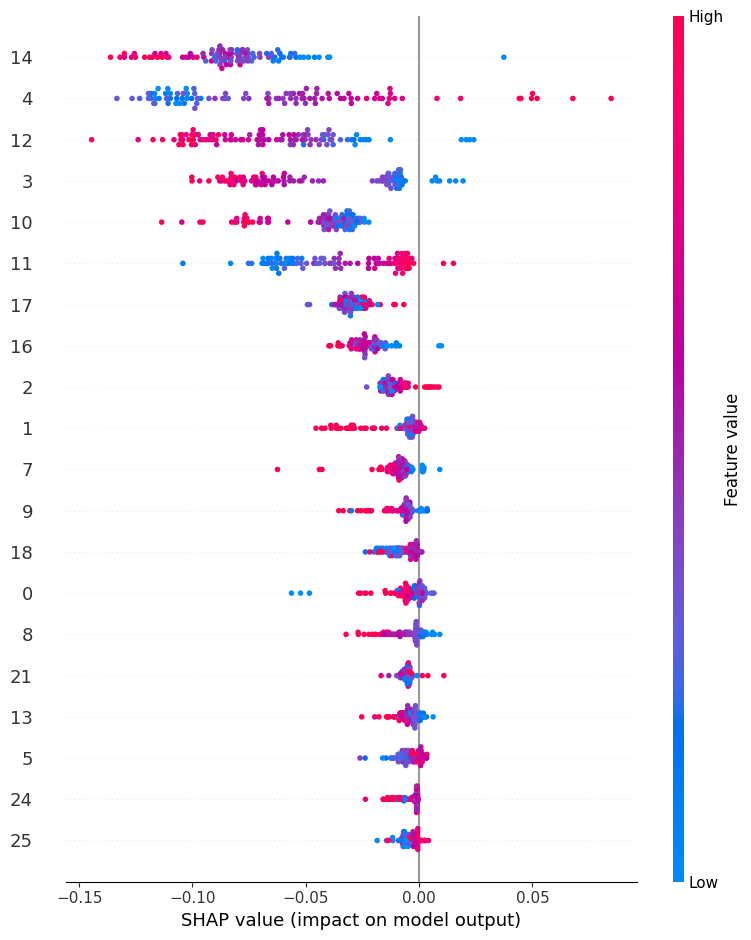

✅ Credit Card Random Forest SHAP plots saved


<Figure size 640x480 with 0 Axes>

In [20]:
# TreeExplainer for Random Forest

explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_explain_creditcard)

# ✅ Global SHAP Summary Plot
shap.summary_plot(shap_values_rf[:, :, 1], X_explain_creditcard)
plt.savefig('/content/drive/MyDrive/FraudPulse/plots/creditcard_rf_shap_summary.png')

# 2️⃣ Local Force Plot
shap.initjs()
force_plot_rf = shap.force_plot(
    explainer_rf.expected_value[1],
    shap_values_rf[0, :, 1],
    X_explain_creditcard.iloc[0]
)
shap.save_html('/content/drive/MyDrive/FraudPulse/plots/creditcard_rf_force_plot.html', force_plot_rf)

print("✅ Credit Card Random Forest SHAP plots saved")


# ----------------------------------
# 📌 3️⃣ Fraud Data - Logistic Regression
# ----------------------------------

In [25]:
X_explain_fraud = X_explain_fraud.drop(columns=['class'], errors='ignore')

/tmp/ipython-input-26-1065746406.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_logreg, X_explain_fraud)


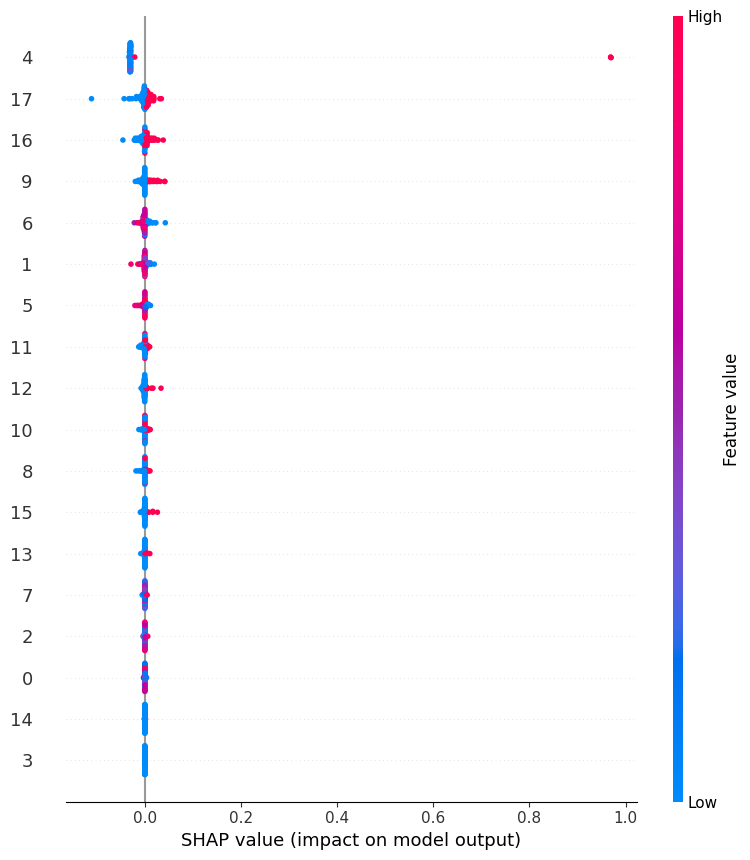

✅ Fraud Data Logistic Regression SHAP plots saved
All SHAP explainability plots done!


<Figure size 640x480 with 0 Axes>

In [26]:
# KernelExplainer for Logistic Regression
explainer_logreg = shap.Explainer(model_logreg.predict, X_explain_fraud)
shap_values_logreg = explainer_logreg(X_explain_fraud)

# ✅ Global SHAP Summary Plot
shap.summary_plot(shap_values_logreg, X_explain_fraud)
plt.savefig('/content/drive/MyDrive/FraudPulse/plots/fraud_logreg_shap_summary.png')

# ✅ Local SHAP Force Plot
force_plot_logreg = shap.force_plot(
    shap_values_logreg[0].base_values,
    shap_values_logreg[0].values,
    X_explain_fraud.iloc[0]
)
shap.save_html('/content/drive/MyDrive/FraudPulse/plots/fraud_logreg_force_plot.html', force_plot_logreg)
print("✅ Fraud Data Logistic Regression SHAP plots saved")

print("All SHAP explainability plots done!")
